<a href="https://colab.research.google.com/github/joony0512/Deep_Learning_Class/blob/main/Part7/P7_Ch01_CH02%2C03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST RNN Classifier


## 2. Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from IPython.display import Image

In [3]:
mnist = keras.datasets.mnist
(train_images, train_labels ), (test_images, test_labels) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


### 데이터 범위 파악

In [4]:
print(list(filter(lambda x : x!=0,train_images[0].reshape(-1)))[:10])
print(list(filter(lambda x : x!=0,train_labels.reshape(-1)))[:10])
print(list(filter(lambda x : x!=0,test_images[0].reshape(-1)))[:10])
print(list(filter(lambda x : x!=0,test_labels.reshape(-1)))[:10])

[3, 18, 18, 18, 126, 136, 175, 26, 166, 255]
[5, 4, 1, 9, 2, 1, 3, 1, 4, 3]
[84, 185, 159, 151, 60, 36, 222, 254, 254, 254]
[7, 2, 1, 4, 1, 4, 9, 5, 9, 6]


In [5]:
print(max(train_images[0].reshape(-1)))
print(min(train_images[0].reshape(-1)))
print(max(test_images[0].reshape(-1)))
print(min(test_images[0].reshape(-1)))

255
0
255
0


In [6]:
train_images = train_images.astype(np.float64)
test_images = test_images.astype(np.float64)


## Normalization

In [7]:
train_images = train_images/255
test_images = test_images/255


In [8]:
print(list(filter(lambda x : x!=0,train_images[0].reshape(-1)))[:10])
print(list(filter(lambda x : x!=0,train_labels.reshape(-1)))[:10])
print(list(filter(lambda x : x!=0,test_images[0].reshape(-1)))[:10])
print(list(filter(lambda x : x!=0,test_labels.reshape(-1)))[:10])

[0.011764705882352941, 0.07058823529411765, 0.07058823529411765, 0.07058823529411765, 0.49411764705882355, 0.5333333333333333, 0.6862745098039216, 0.10196078431372549, 0.6509803921568628, 1.0]
[5, 4, 1, 9, 2, 1, 3, 1, 4, 3]
[0.32941176470588235, 0.7254901960784313, 0.6235294117647059, 0.592156862745098, 0.23529411764705882, 0.1411764705882353, 0.8705882352941177, 0.996078431372549, 0.996078431372549, 0.996078431372549]
[7, 2, 1, 4, 1, 4, 9, 5, 9, 6]


In [9]:
train_images.shape,train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [10]:
train_images.dtype, train_labels.dtype, test_images.dtype, test_labels.dtype

(dtype('float64'), dtype('uint8'), dtype('float64'), dtype('uint8'))

## 3. 시각화

In [16]:
train_images[:5].shape

(5, 28, 28)

In [24]:
print(train_images[:5].reshape(28, 28*5).shape)
print(np.hstack(train_images[:5]).shape)

(28, 140)
(28, 140)


In [23]:
train_images[:5].transpose(( 1,0,2)).reshape(28,-1).shape

(28, 140)

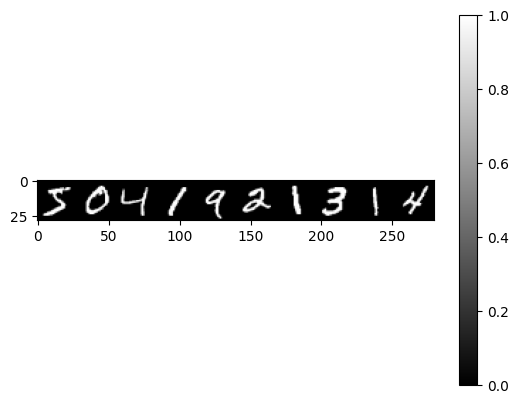

[5 0 4 1 9 2 1 3 1 4]


In [35]:
# plt.imshow(train_images[:5].reshape(28, 28*5))
# plt.imshow(np.hstack(train_images[:5]))
plt.imshow(train_images[:10].transpose((1,0,2)).reshape(28,-1), cmap ='gray')
plt.colorbar()
plt.show()
print(train_labels[:10])
